In [10]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2
import os
import json
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

61
22
17
center_colors
[52.23446894 43.88817635 55.7490982 ]
[203.33518313 192.40399556 186.36847947]
[176.06428571  79.89714286  89.62857143]


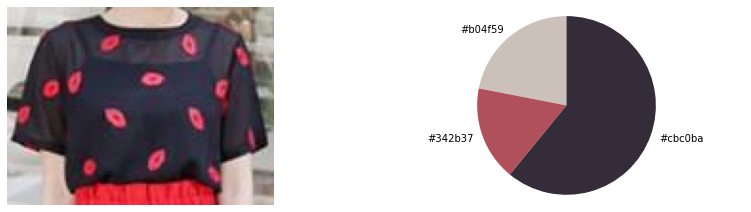

10
25
65
center_colors
[90.74880383 67.46172249 70.24880383]
[200.4284304  179.21816387 177.95162883]
[235.6315197   56.27954972  78.18949343]


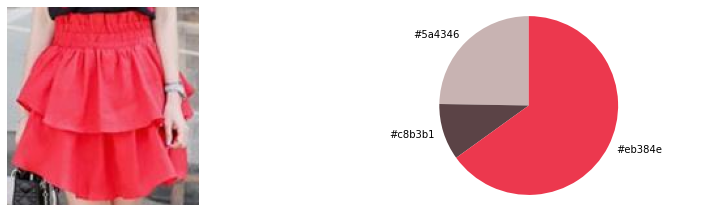

25
35
41
center_colors
[152.96819085 117.13121272  88.12723658]
[184.82773109 183.89495798 176.54481793]
[156.97713598 153.35679904 143.30144404]


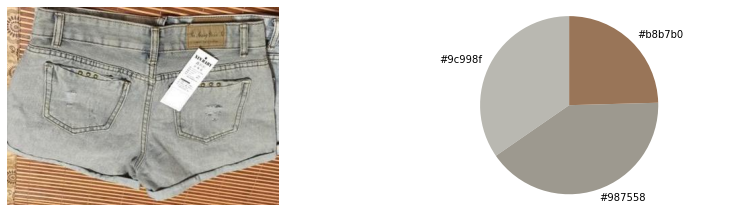

49
33
18
center_colors
[147.25587206 150.7976012  143.49225387]
[232.616      229.11854545 212.19418182]
[33.17916667 33.25694444 30.45972222]


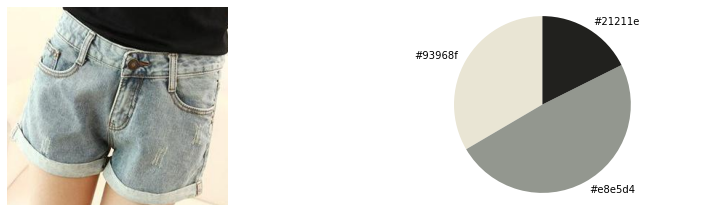

63
14
22
center_colors
[30.89734717 29.12033833 26.2414456 ]
[164.34075342 147.74143836 128.22945205]
[243.64763996 241.04390779 225.41492865]


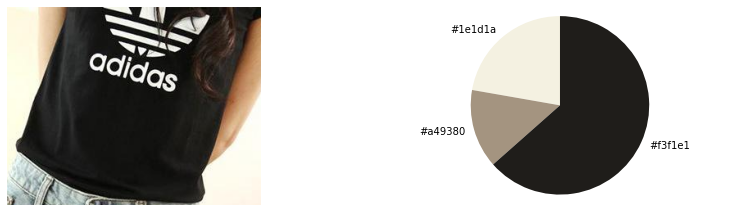

47
32
21
center_colors
[218.96652935 218.54016478 196.45417096]
[58.45306439 36.43910008 62.39565555]
[160.91445087 144.42543353 136.09364162]


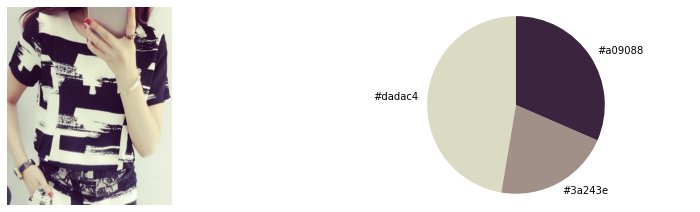

46
34
19
center_colors
[224.75569687 226.85903551 207.60307366]
[63.55130927 45.80184006 73.31422505]
[162.3241206  151.65829146 144.68090452]


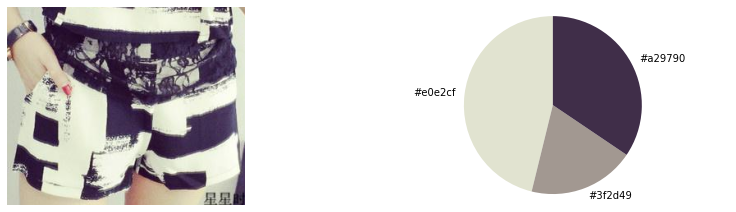

21
27
53
center_colors
[229.50117925 225.15448113 213.36674528]
[112.47548566  91.20629047  80.68547641]
[160.80802953 154.53299492 144.12090448]


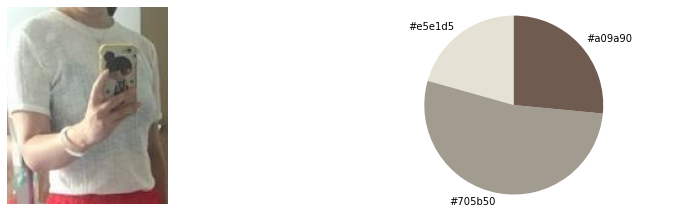

59
31
10
center_colors
[122.49937785  47.64122771  49.18540025]
[209.61664075  50.13530327  67.05209953]
[195.31328321 169.49373434 155.86967419]


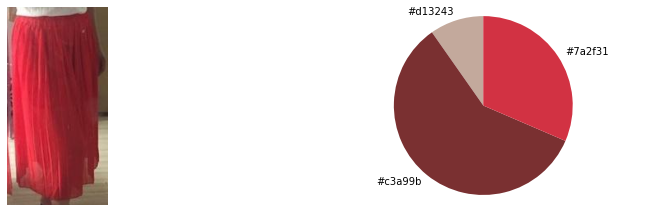

44
21
35
center_colors
[174.55153203  66.14930362  98.0362117 ]
[207.97494305 201.01252847 186.238041  ]
[72.11595221 34.0449754  65.44694308]


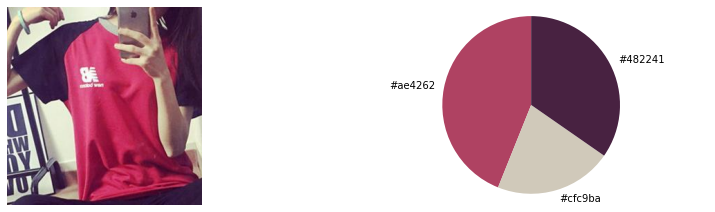

58
25
17
center_colors
[48.46543779 21.3431085  52.05613741]
[135.16256158  60.04433498  84.608867  ]
[180.28097983 167.4610951  153.8443804 ]


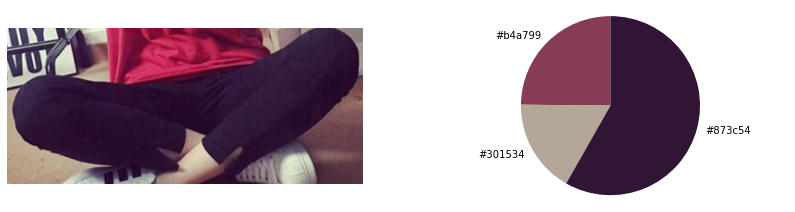

In [12]:
base_location = 'C:/Users/qingyu/Desktop/123/'
jList = os.listdir(base_location)

for file in jList:
    
    if file.endswith(".jpg"):
        #img = Image.open( os.path.join(base_location,file))
        #img = cv2.imread("C:\\Users\\qingyu\\Desktop\\123\\000032.jpg")
        img = cv2.imread(os.path.join(base_location,file))
        
    if file.endswith(".json"):
        with open(os.path.join(base_location,file) , 'r') as reader:
            jf = json.loads(reader.read())
        strjf = str(jf)
        maxi = strjf.count('item') + 1
        for i in range (1,maxi):
            stri = str(i)
            # 裁切區域的 x 與 y 座標（左上角）
            x1 = jf['item'+stri]['bounding_box'][0]
            y1 = jf['item'+stri]['bounding_box'][3]
            # 裁切區域的 x 與 y 座標（右下角）
            x2 = jf['item'+stri]['bounding_box'][2]
            y2 = jf['item'+stri]['bounding_box'][1]
            # 裁切圖片
            crop_img = img[y2:y1, x1:x2]
            #cv2.imshow("org", img)
            #cv2.imshow("cropped", crop_img)           
            cv2.waitKey(0)
            #cv2.imwrite('000032.jpg', crop_img)
            
            # load image
            #取最高的 k 個顏色
            k=3 
            #img_bgr = cv2.imread(path)
            img_rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

            # resize image to speed up processing time
            resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

            # reshape the image to be a list of pixels
            img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

            # cluster the pixels and assign labels
            clt = KMeans(n_clusters=k)
            labels = clt.fit_predict(img_list)  

            # count labels to find most popular
            label_counts = Counter(labels)
            total_count = sum(label_counts.values())
            new_dict = dict(label_counts)

            #顏色比例
            for i in range(0,len(new_dict)):
                count = new_dict.get(i)
                percent = round(count/total_count*100)
                print(percent)

            # subset out most popular centroid
            #RGB
            center_colors = list(clt.cluster_centers_)
            ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
            color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
            count = len(center_colors)
            print("center_colors")
            for i in range(0,count):
                print(center_colors[i])

            # plots
            plt.figure(figsize=(14, 8))
            plt.subplot(221)
            plt.imshow(img_rgb)
            plt.axis('off')

            plt.subplot(222)
            plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
            plt.axis('equal')
            plt.show()
